In [72]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation as ani
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.random as rd
from scipy import stats as st
#sns.set(style="darkgrid", palette="muted", color_codes=True)
plt.rcParams["patch.force_edgecolor"] = True
%config InlineBackend.figure_format='retina'
import sys
import os
import IPython.display as ipyd


In [73]:
n_sample = 10
alpha = 0.05
x = np.linspace(-4,4,301)
t = st.t.pdf(x, df=n_sample-1)

In [74]:
t_025 = st.t.isf(alpha/2, df=n_sample-1)

x_025_lower = np.linspace(-4, -t_025, 101)
x_025_upper = np.linspace(t_025, 4, 101)
x_025 = np.linspace(-t_025, t_025, 301)

t_025_fill_lower = st.t.pdf(x_025_lower, df=n_sample-1)
t_025_fill_upper = st.t.pdf(x_025_upper, df=n_sample-1)
t_025_fill = st.t.pdf(x_025, df=n_sample-1)

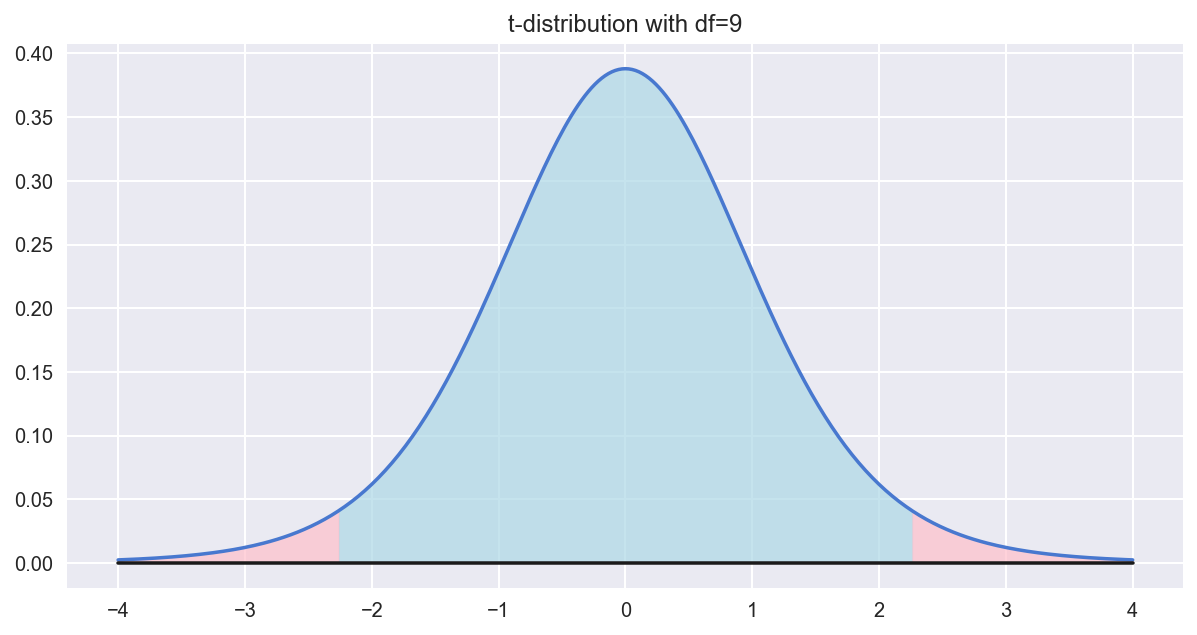

In [75]:
plt.figure(figsize=(10, 5))
plt.plot(x, t)
plt.fill_between(x_025, t_025_fill, color="lightblue", alpha=0.7)
plt.fill_between(x_025_lower, t_025_fill_lower, color="pink", alpha=0.7)
plt.fill_between(x_025_upper, t_025_fill_upper, color="pink", alpha=0.7)

plt.plot([np.min(x), np.max(x)],[0, 0], "k")
plt.title("t-distribution with df={}".format(n_sample-1))

# 区間推定

In [76]:
n_sample = 100
rs = np.random.RandomState(71)

# 正規分布に従うデータを100万個生成（これが母集団だと見なす）
d = rs.normal(30, 5, size=1000000)
df = pd.DataFrame(d, columns=['data'])

/Users/matsuken/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


average:30.003163653546167


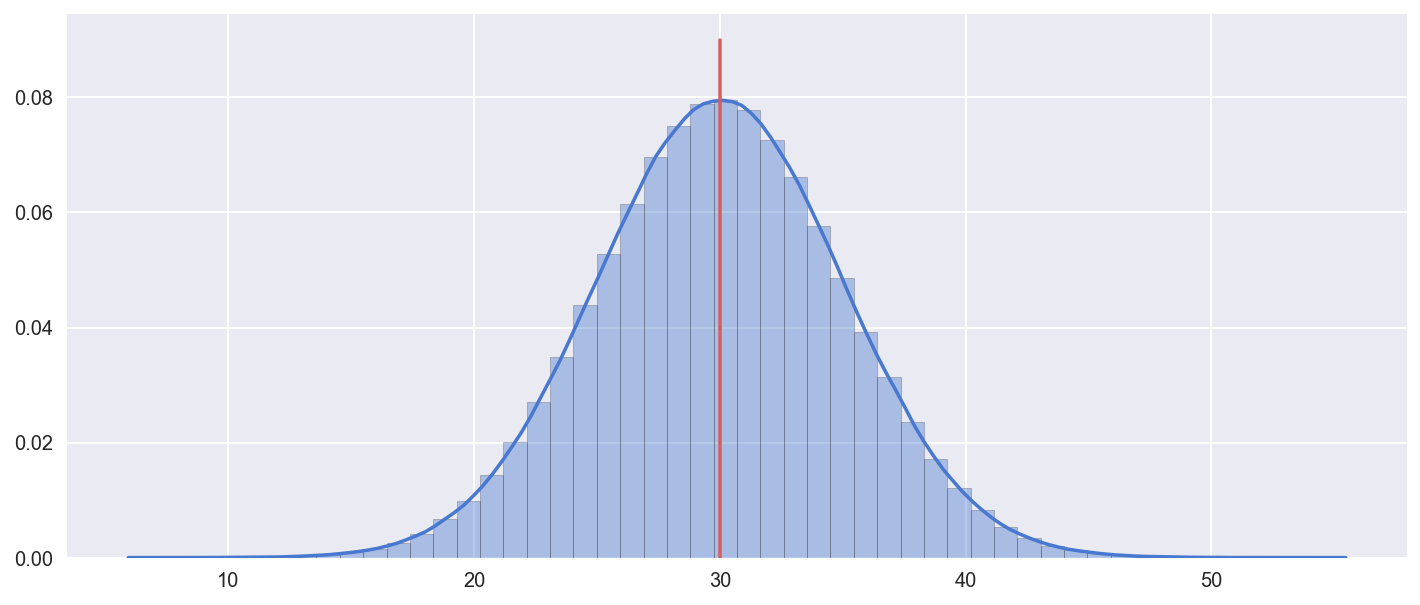

In [77]:
# 母集団の様子を可視化
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=True, kde=True, rug=False, color="b")

# Calculate average
m = np.mean(d)
print("average:{}".format(m))
plt.plot([m,m],[0,0.09], 'r')

plt.show()

/Users/matsuken/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


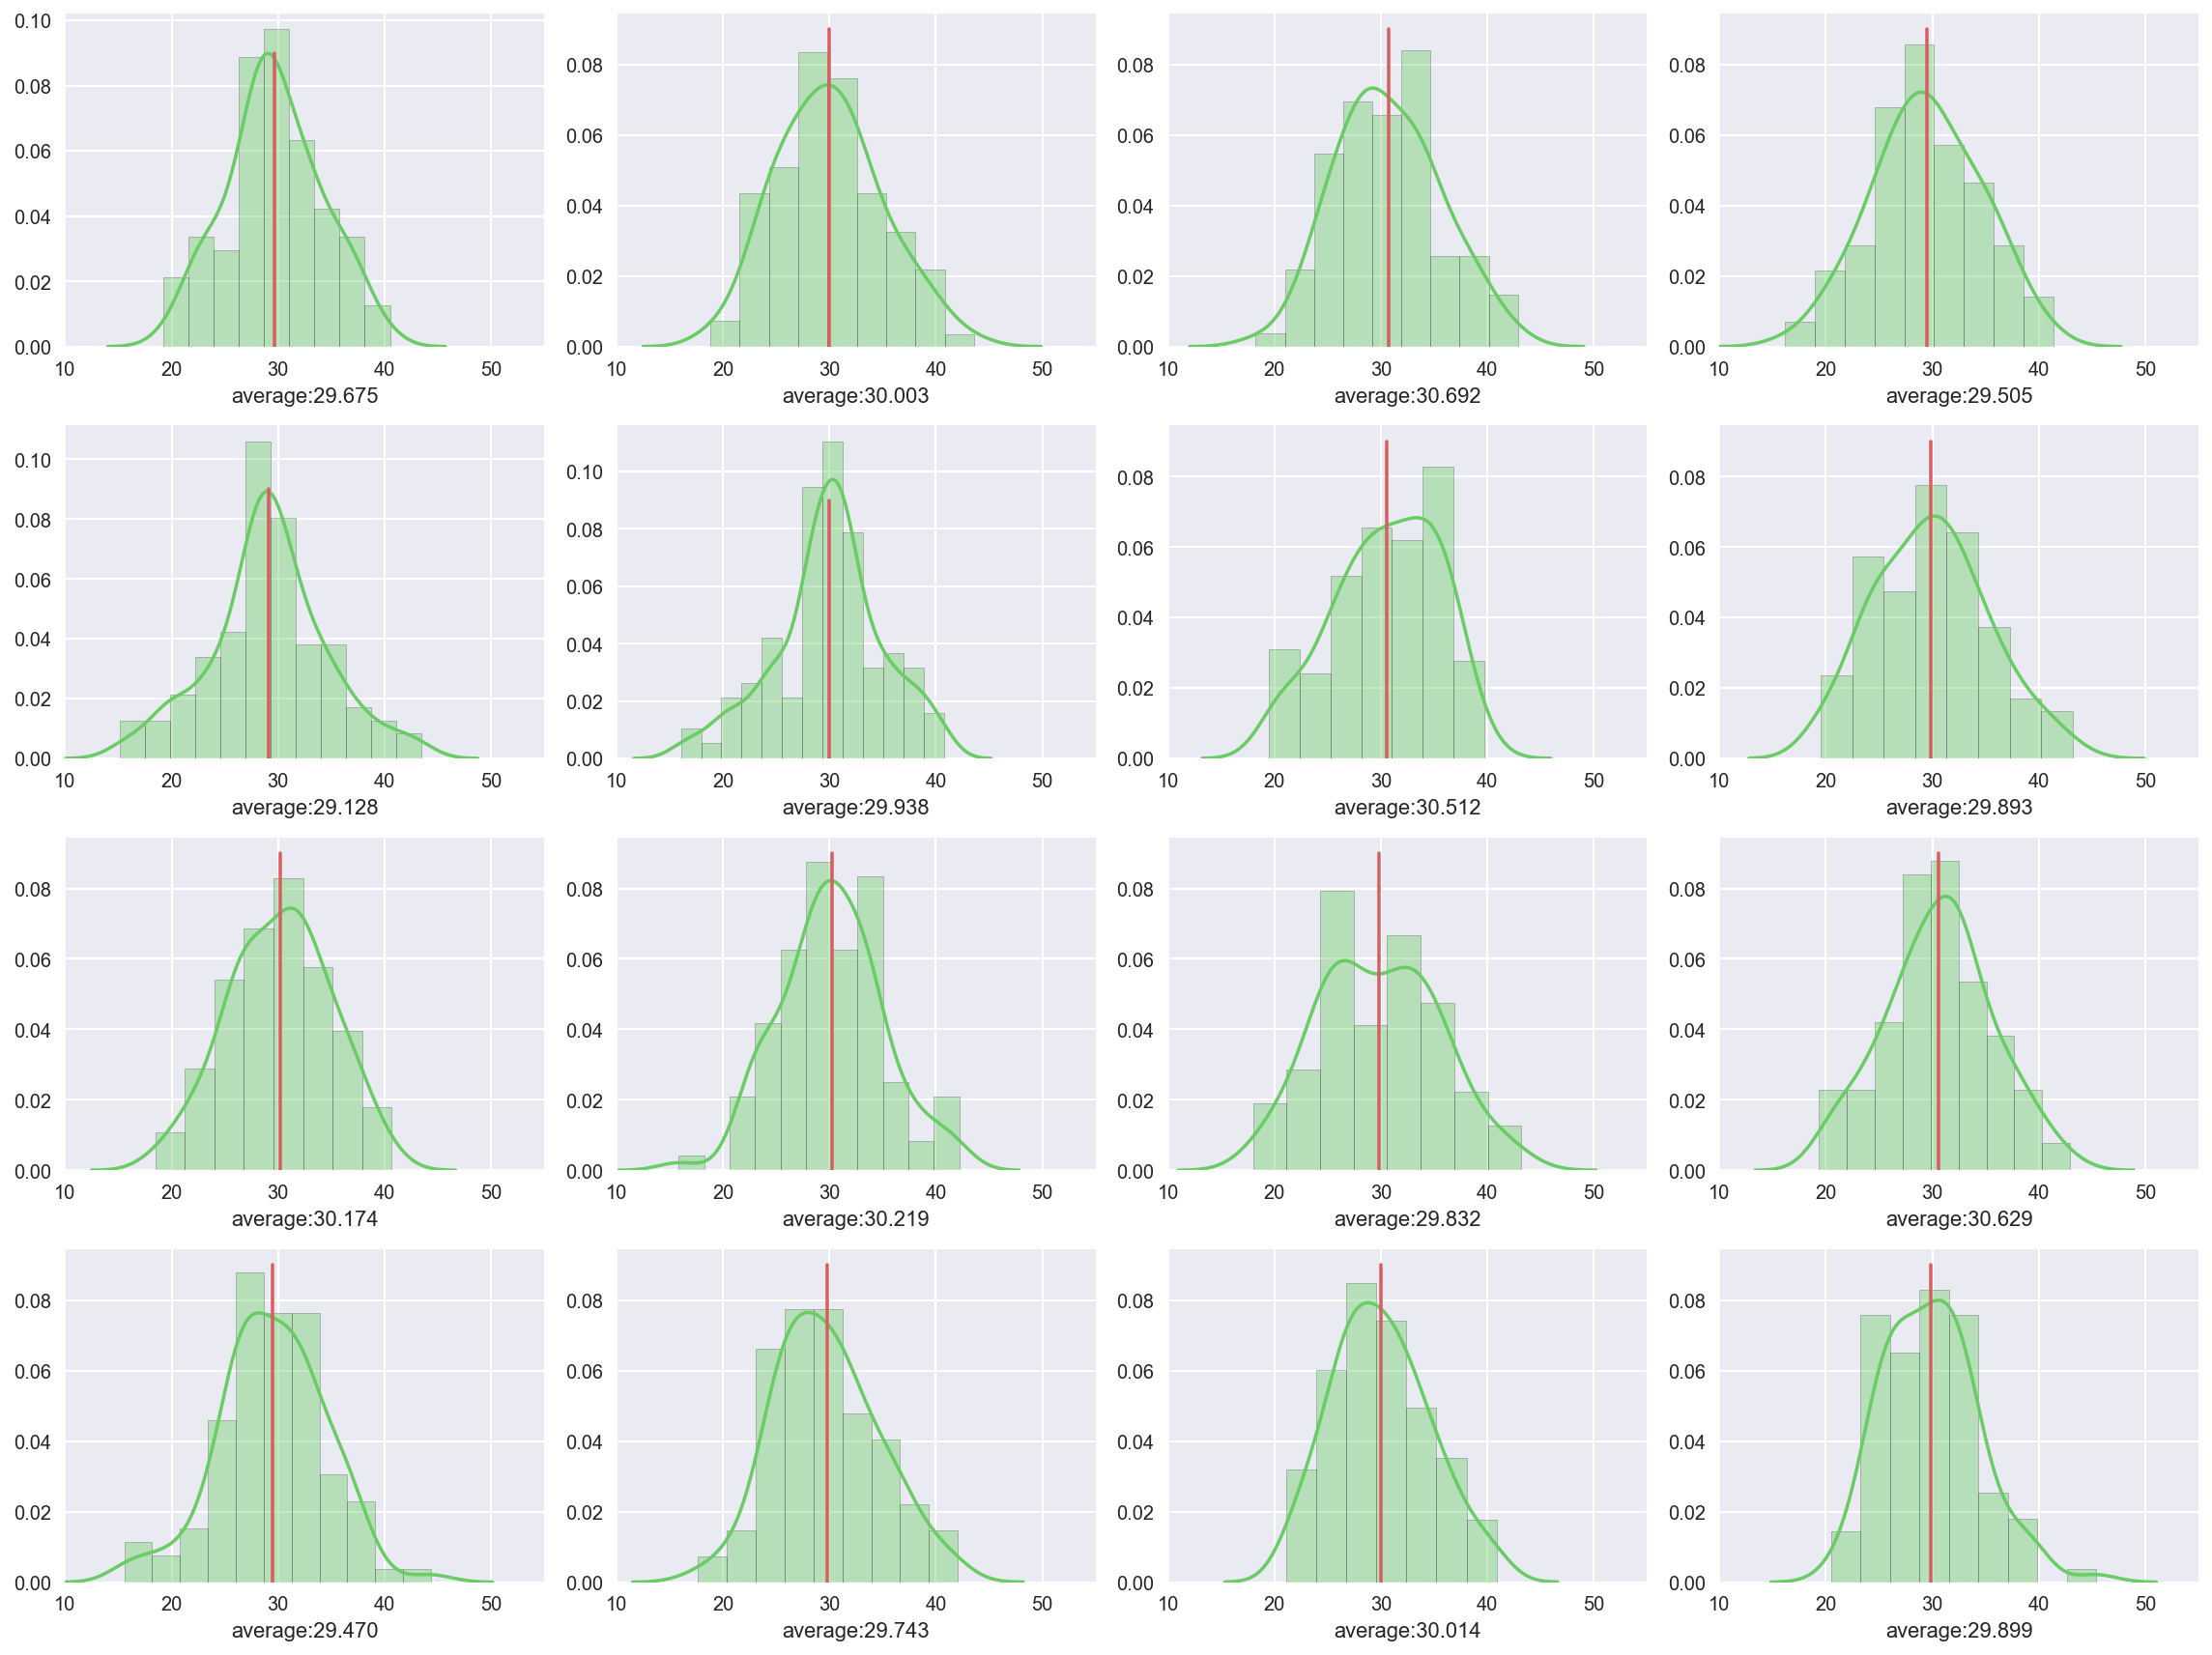

In [78]:
# 100個のサンプルの分布を可視化
ncol = 4
nrow = 4

f, axes = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*3))

for i in range(nrow):
    for j in range(ncol):
        # print ("({},{})".format(i, j), end=", ")
        sample = df.sample(n=n_sample)
        m = np.mean(sample)
        sns.distplot(sample, hist=True, kde=True, rug=False, color="g", ax=axes[i, j], 
                     axlabel="average:{0:.3f}".format(float(m)))
        axes[i, j].plot([m,m],[0,0.09], 'r')
        axes[i, j].set_xlim(10,55)
        
plt.tight_layout()

In [79]:
# t値を計算
alpha = 0.05
t_005 = st.t.isf(alpha/2, df=n_sample-1)
t_005

1.9842169515086832

CPU times: user 23.7 s, sys: 184 ms, total: 23.8 s
Wall time: 24.1 s
average:30.022395826695526


/Users/matsuken/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


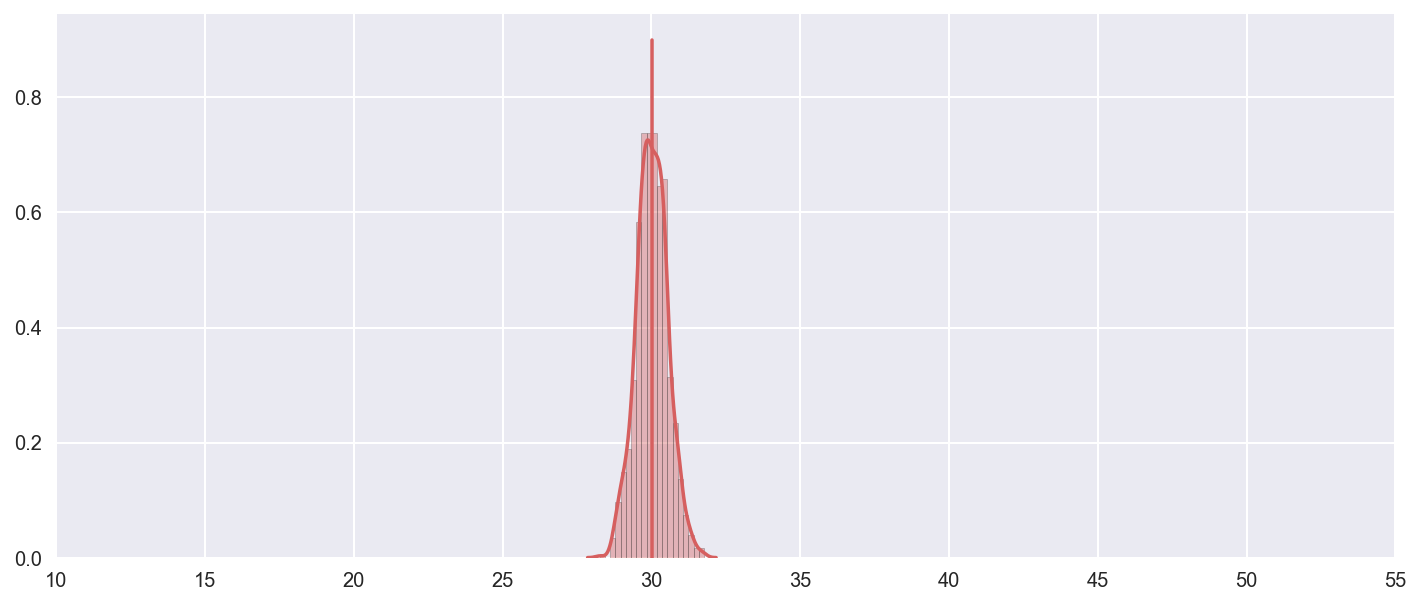

average:30.022395826695526
sd:0.5233769437867957


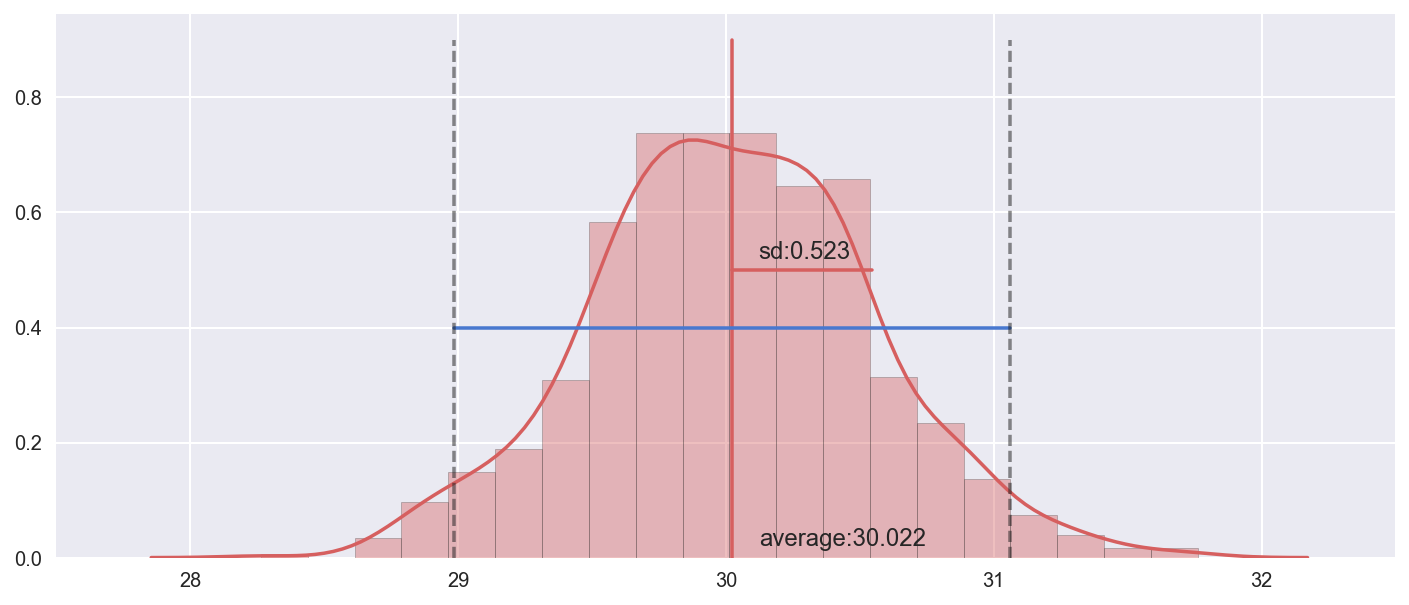

In [80]:
# 100個の標本を1000回取り出しての平均値でヒストグラムを描いてみる

%time ave_list = [np.mean(df.sample(n=n_sample)) for _ in range(1000)]

f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(ave_list, hist=True, kde=True, rug=False, bins=20, color="r")

# Calculate average
m = np.mean(ave_list)
print("average:{}".format(m))
plt.plot([m,m],[0,0.9], 'r')
plt.xlim(10,55)
plt.show()

f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(ave_list, hist=True, kde=True, rug=False, bins=20, color="r")

# Calculate average
m = np.mean(ave_list)
sd = np.sqrt(np.var(ave_list))
print("average:{}".format(m))
print("sd:{}".format(sd))
plt.plot([m,m],[0,0.9], 'r')
plt.text(m+.1,0.02,"average:{0:.3f}".format(m), size=12)
plt.plot([m,m+sd],[0.5,0.5],"r")
plt.text(m+.1,0.52,"sd:{0:.3f}".format(sd), size=12)
plt.plot([m-t_005*sd,m+t_005*sd],[0.4,0.4])
plt.plot([m-t_005*sd,m-t_005*sd],[0,0.9], "k--", alpha=.5)
plt.plot([m+t_005*sd,m+t_005*sd],[0,0.9], "k--", alpha=.5)

plt.xlim(27.5,32.5)
plt.show()

capture ratio:0.048


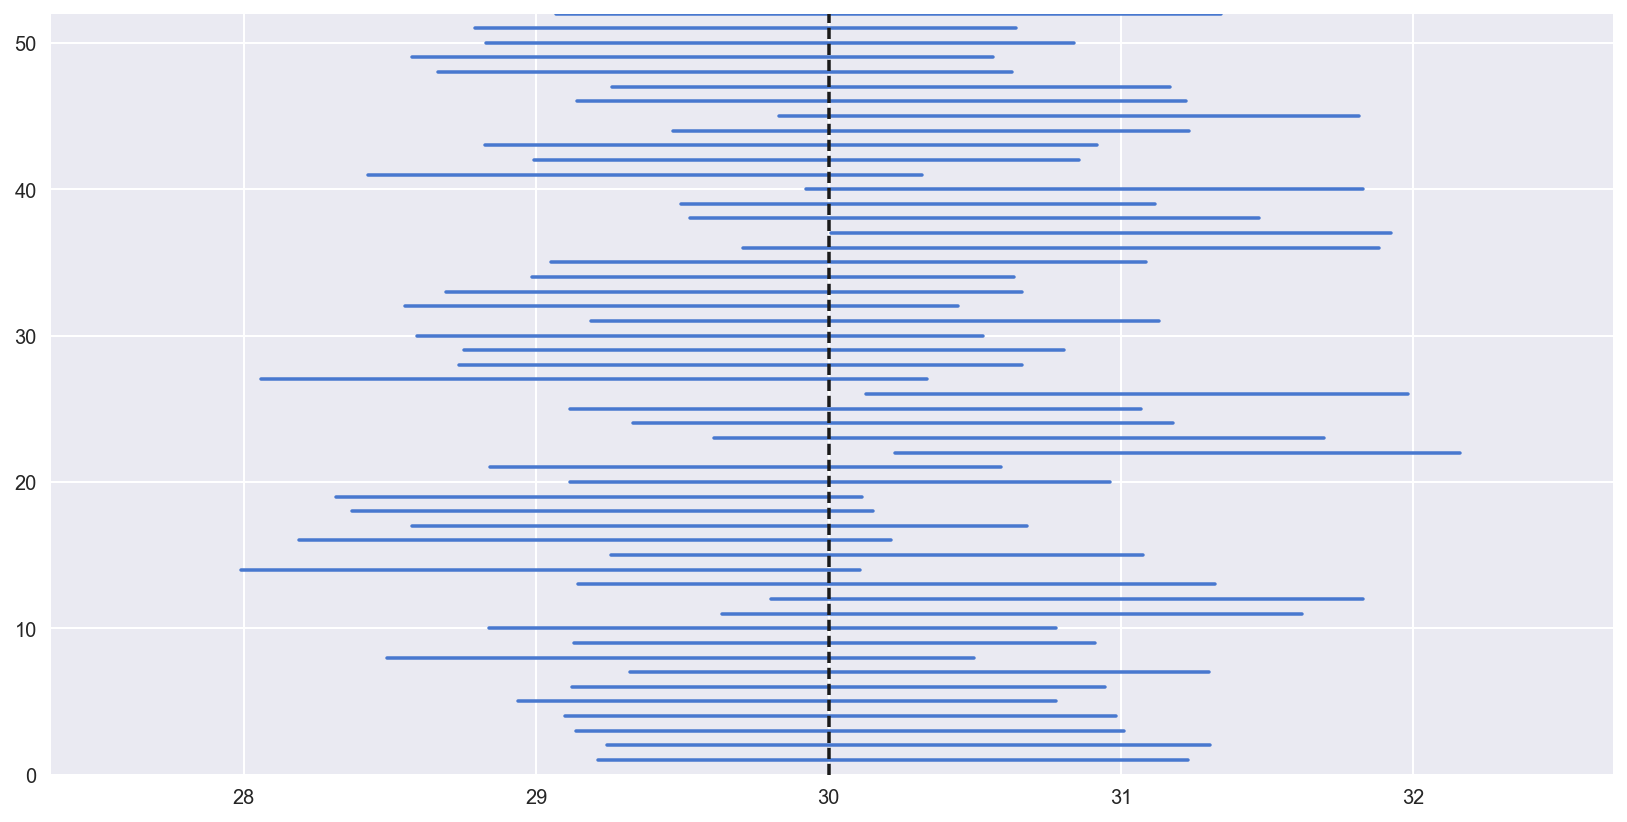

In [81]:
# 100個のサンプルを50回取得する
sample = [df.sample(n=n_sample) for _ in range(1000)]

res = []
for d in sample:
    m = np.mean(d)
    sd = np.sqrt(np.var(d))
    n = len(d)
    upper = m + t_005*sd/np.sqrt(n)
    lower = m - t_005*sd/np.sqrt(n)
    #print "(u:{0:.3f}, l:{1:.3f},)".format(float(upper), float(lower))
    res.append((float(lower), float(upper)))

plt.figure(figsize=(14, 7))

cnt = 0
for i, d in enumerate(res):
    plt.plot([d[0],d[1]], [i+1, i+1], "b")
    if d[0] > 30 or d[1] < 30:
        cnt += 1
    
plt.plot([30, 30],[0,52], "k--")
plt.ylim(0,52)
print("capture ratio:{}".format(cnt/float(len(res))))

capture ratio:0.048


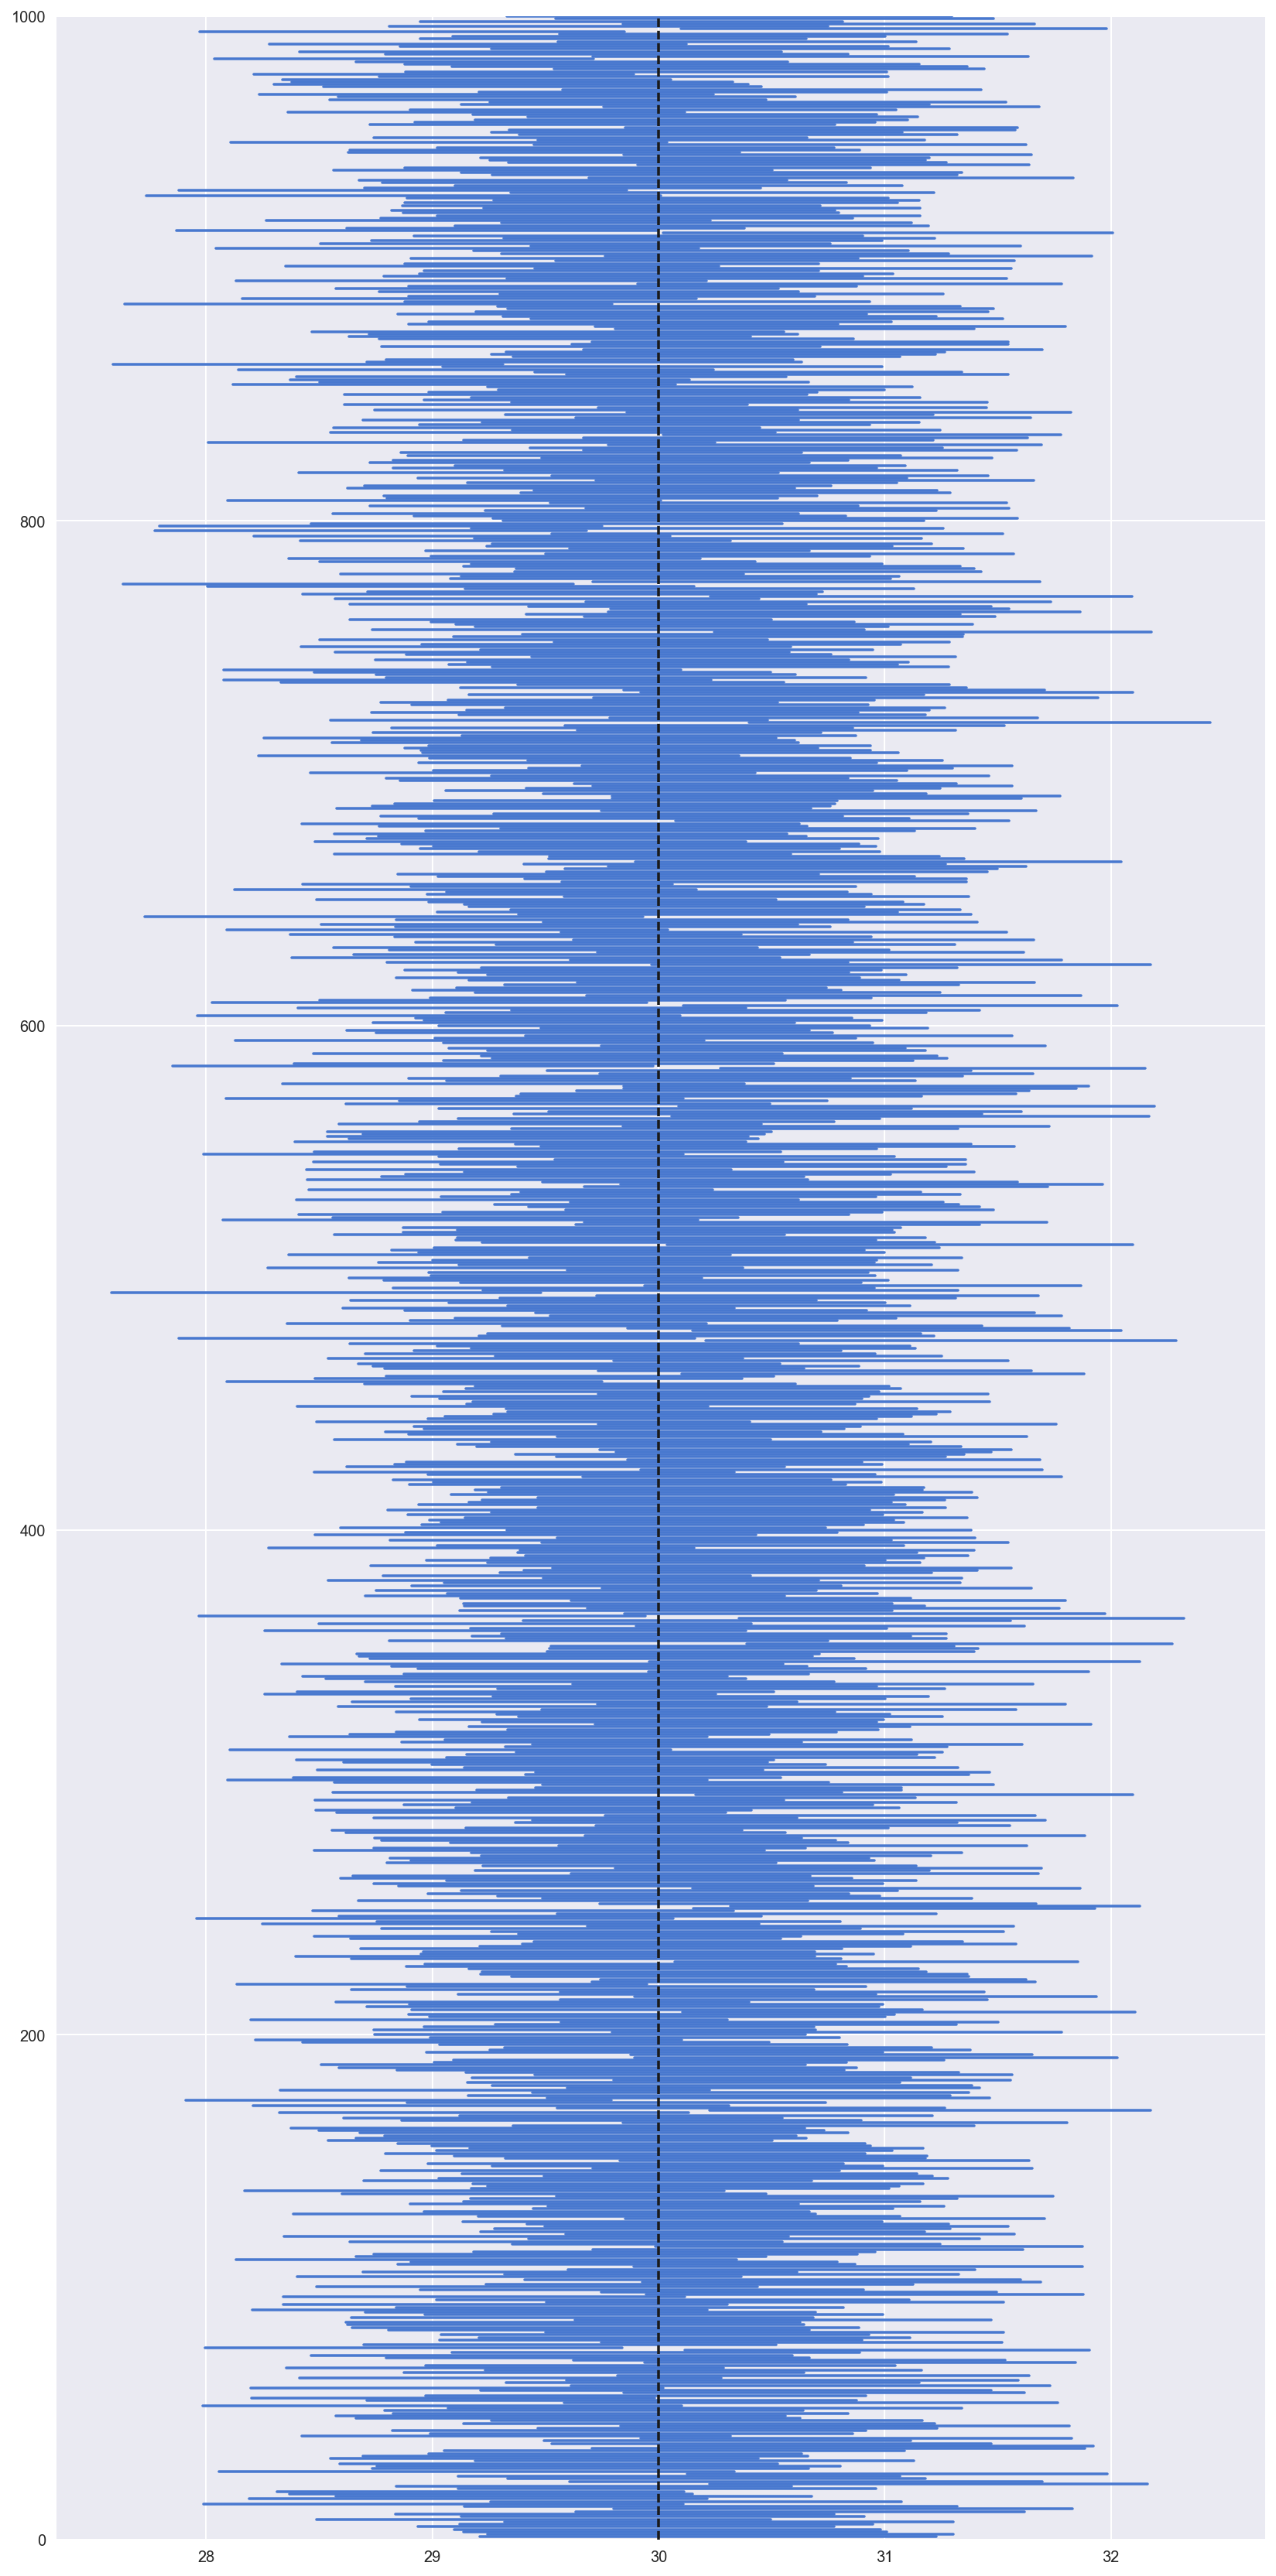

In [82]:
# 1000個全てを表示
plt.figure(figsize=(14, 30))

cnt = 0
for i, d in enumerate(res):
    plt.plot([d[0],d[1]], [i+1, i+1], "b")
    if d[0] > 30 or d[1] < 30:
        cnt += 1
    
plt.plot([30, 30],[0,1000], "k--")
plt.ylim(0,1000)
print("capture ratio:{}".format(cnt/float(len(res))))